In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("inflasi copy.csv", sep=",")
df

,Periode,Data Inflasi
0,Januari 2003,8.680000
1,Februari 2003,7.600000
2,Maret 2003,7.170000
3,April 2003,7.620000
4,Mei 2003,7.150000
...,...,...
244,Prediksi data ke-5,5.628607
245,Prediksi data ke-6,5.615157
246,Prediksi data ke-7,5.602983
247,Prediksi data ke-8,5.562800


In [3]:
df_copy = df.copy()
jumlah_prediksi = 10

In [4]:
df_copy

,Periode,Data Inflasi
0,Januari 2003,8.680000
1,Februari 2003,7.600000
2,Maret 2003,7.170000
3,April 2003,7.620000
4,Mei 2003,7.150000
...,...,...
244,Prediksi data ke-5,5.628607
245,Prediksi data ke-6,5.615157
246,Prediksi data ke-7,5.602983
247,Prediksi data ke-8,5.562800


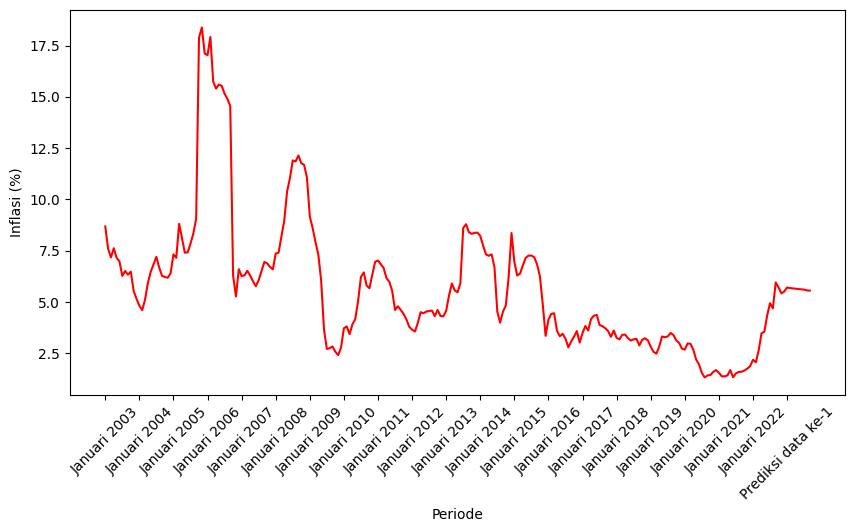

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_copy['Periode'], df_copy['Data Inflasi'], color='red')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(df_copy.index)-1,12))
plt.show()

In [6]:
Di = df_copy['Data Inflasi']
Dmin = Di.min()
Dmax = Di.max()
U = [Dmin, Dmax]

print(U)

[1.32, 18.38]


In [7]:
# D1 = 0.32
# D2 = 0.62
# R = Dmax+D2 - (Dmin-D1)
R = Dmax - Dmin
n = Di.count()
K = 1 + (3.322 * math.log10(n))
L = (R/K)

print(R, n, K, L)

17.06 249 8.960174231052036 1.9039808334170016


In [8]:
himpunan_fuzzy = pd.DataFrame()
ui = []
Ai = []
batas_bawah = []
batas_atas = []
ui.append('u1')
Ai.append('A1')
batas_bawah.append(Dmin)
batas_atas.append(batas_bawah[0] + L)
rounded_up = math.ceil(K)

for i in range(1, rounded_up):
    ui.append('u'+str(i+1))
    Ai.append('A'+str(i+1))
    batas_bawah.append(batas_atas[i-1])
    batas_atas.append(batas_bawah[i] + L)

himpunan_fuzzy['ui'] = ui
himpunan_fuzzy['Ai'] = Ai
himpunan_fuzzy['batas bawah'] = batas_bawah
himpunan_fuzzy['batas atas'] = batas_atas

In [9]:
himpunan_fuzzy['mi'] = (himpunan_fuzzy['batas bawah'] + himpunan_fuzzy['batas atas'])/2

In [10]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi
0,u1,A1,1.320000,3.223981,2.271990
1,u2,A2,3.223981,5.127962,4.175971
2,u3,A3,5.127962,7.031943,6.079952
3,u4,A4,7.031943,8.935923,7.983933
4,u5,A5,8.935923,10.839904,9.887914
5,u6,A6,10.839904,12.743885,11.791895
6,u7,A7,12.743885,14.647866,13.695875
7,u8,A8,14.647866,16.551847,15.599856
8,u9,A9,16.551847,18.455828,17.503837


In [11]:
# Misalkan df_copy dan himpunan_fuzzy telah didefinisikan sebelumnya

data_inflasi = df_copy['Data Inflasi']

# Menambah kolom frekuensi ke dalam himpunan_fuzzy
himpunan_fuzzy['frekuensi'] = 0

for i in data_inflasi:
    hf_copy = himpunan_fuzzy
    kondisi1 = hf_copy['batas bawah'] <= i
    kondisi2 = hf_copy['batas atas'] >= i
    dfAi = hf_copy.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    
    # Menghitung jumlah data yang memenuhi kriteria
    jumlah_data = len(dfAi)
    
    # Mengupdate frekuensi langsung di dalam himpunan_fuzzy
    himpunan_fuzzy.loc[(himpunan_fuzzy['batas bawah'] <= i) & (himpunan_fuzzy['batas atas'] >= i), 'frekuensi'] += jumlah_data

# Sekarang himpunan_fuzzy sudah memiliki kolom frekuensi yang terisi

In [12]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,1.320000,3.223981,2.271990,51
1,u2,A2,3.223981,5.127962,4.175971,70
2,u3,A3,5.127962,7.031943,6.079952,69
3,u4,A4,7.031943,8.935923,7.983933,36
4,u5,A5,8.935923,10.839904,9.887914,4
5,u6,A6,10.839904,12.743885,11.791895,7
6,u7,A7,12.743885,14.647866,13.695875,1
7,u8,A8,14.647866,16.551847,15.599856,6
8,u9,A9,16.551847,18.455828,17.503837,5


In [13]:
hf_copy = himpunan_fuzzy.copy()
hf_copy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,1.320000,3.223981,2.271990,51
1,u2,A2,3.223981,5.127962,4.175971,70
2,u3,A3,5.127962,7.031943,6.079952,69
3,u4,A4,7.031943,8.935923,7.983933,36
4,u5,A5,8.935923,10.839904,9.887914,4
5,u6,A6,10.839904,12.743885,11.791895,7
6,u7,A7,12.743885,14.647866,13.695875,1
7,u8,A8,14.647866,16.551847,15.599856,6
8,u9,A9,16.551847,18.455828,17.503837,5


In [14]:
# Hitung rata-rata frekuensi
rata_rata = himpunan_fuzzy['frekuensi'].sum() / K
rata_rata_frekuensi = math.ceil(rata_rata)
print(rata_rata_frekuensi)

28


In [15]:
rata_rata = rata_rata_frekuensi
frekuensi = hf_copy['frekuensi'] 
batas_atas = hf_copy['batas atas']
batas_bawah = hf_copy['batas bawah']
nilai_tengah = hf_copy['mi']

new_rows = []
new_ui = []
new_Ai = []

current_batas_bawah = Dmin  # Inisialisasi batas bawah

for i in range(len(frekuensi)):
    if frekuensi[i] > rata_rata:
        count = int(frekuensi[i] // rata_rata)
        remainder = frekuensi[i] % rata_rata
        dividen = count + 1
        
        for j in range(count):
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, rata_rata])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
        
        if remainder > 0:
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, remainder])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
    else:
        new_ui.append(f'u{len(new_ui) + 1}')
        new_Ai.append(f'A{len(new_Ai) + 1}')
        new_rows.append([new_ui[-1], new_Ai[-1], batas_bawah[i], batas_atas[i], nilai_tengah[i], frekuensi[i]])

new_himpunan_fuzzy = pd.DataFrame(new_rows, columns=hf_copy.columns)


In [16]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,1.320000,2.271990,1.795995,28
1,u2,A2,2.271990,3.223981,2.747986,23
2,u3,A3,3.223981,3.858641,3.541311,28
3,u4,A4,3.858641,4.493301,4.175971,28
4,u5,A5,4.493301,5.127962,4.810632,14
5,u6,A6,5.127962,5.762622,5.445292,28
6,u7,A7,5.762622,6.397282,6.079952,28
7,u8,A8,6.397282,7.031943,6.714612,13
8,u9,A9,7.031943,7.983933,7.507938,28
9,u10,A10,7.983933,8.935923,8.459928,8


In [17]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,1.320000,2.271990,1.795995,28
1,u2,A2,2.271990,3.223981,2.747986,23
2,u3,A3,3.223981,3.858641,3.541311,28
3,u4,A4,3.858641,4.493301,4.175971,28
4,u5,A5,4.493301,5.127962,4.810632,14
5,u6,A6,5.127962,5.762622,5.445292,28
6,u7,A7,5.762622,6.397282,6.079952,28
7,u8,A8,6.397282,7.031943,6.714612,13
8,u9,A9,7.031943,7.983933,7.507938,28
9,u10,A10,7.983933,8.935923,8.459928,8


In [18]:
data_inflasi = df_copy['Data Inflasi']

data_fuzzy = []
for i in data_inflasi:
    copy_hf = new_himpunan_fuzzy
    kondisi1 = copy_hf['batas bawah'] <= i
    kondisi2 = copy_hf['batas atas'] >= i
    dfAi = copy_hf.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()] # memfilter 'dfAi' dengan menghapus baris di mana kolom 'ui' memiliki nilai yang hilang (NaN)
    if not dfAi.empty: 
        fuzzifikasi = dfAi['Ai'].iloc[0]
        data_fuzzy.append(fuzzifikasi)
    else:
        data_fuzzy.append(None)  # Atau berikan nilai default lainnya


df_copy['fuzzifikasi'] = data_fuzzy

In [19]:
df_copy

,Periode,Data Inflasi,fuzzifikasi
0,Januari 2003,8.680000,A10
1,Februari 2003,7.600000,A9
2,Maret 2003,7.170000,A9
3,April 2003,7.620000,A9
4,Mei 2003,7.150000,A9
...,...,...,...
244,Prediksi data ke-5,5.628607,A6
245,Prediksi data ke-6,5.615157,A6
246,Prediksi data ke-7,5.602983,A6
247,Prediksi data ke-8,5.562800,A6


In [20]:
new_hf = new_himpunan_fuzzy.copy()
new_hf

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,1.320000,2.271990,1.795995,28
1,u2,A2,2.271990,3.223981,2.747986,23
2,u3,A3,3.223981,3.858641,3.541311,28
3,u4,A4,3.858641,4.493301,4.175971,28
4,u5,A5,4.493301,5.127962,4.810632,14
5,u6,A6,5.127962,5.762622,5.445292,28
6,u7,A7,5.762622,6.397282,6.079952,28
7,u8,A8,6.397282,7.031943,6.714612,13
8,u9,A9,7.031943,7.983933,7.507938,28
9,u10,A10,7.983933,8.935923,8.459928,8


In [21]:
next_state = []
for x in range(0, len(df_copy.index)-1):
    Ns = df_copy['fuzzifikasi'].iloc[x+1]
    next_state.append(Ns)

df_copy['next state'] = pd.Series(next_state)

In [22]:
df_copy

,Periode,Data Inflasi,fuzzifikasi,next state
0,Januari 2003,8.680000,A10,A9
1,Februari 2003,7.600000,A9,A9
2,Maret 2003,7.170000,A9,A9
3,April 2003,7.620000,A9,A9
4,Mei 2003,7.150000,A9,A8
...,...,...,...,...
244,Prediksi data ke-5,5.628607,A6,A6
245,Prediksi data ke-6,5.615157,A6,A6
246,Prediksi data ke-7,5.602983,A6,A6
247,Prediksi data ke-8,5.562800,A6,A6


In [23]:
# Membuat FLR 
data_fuzzifikasi = df_copy['fuzzifikasi']
jumlah_Ai = new_hf['Ai']
FLR = []
FLRG = []
for i in range(len(data_fuzzifikasi) - 1):
    FLR.append(f"{data_fuzzifikasi[i]}->{data_fuzzifikasi[i+1]}")

# Menggabungkan FLR ke dalam DataFrame
df_copy['FLR'] = pd.Series(FLR)

In [24]:
df_copy

,Periode,Data Inflasi,fuzzifikasi,next state,FLR
0,Januari 2003,8.680000,A10,A9,A10->A9
1,Februari 2003,7.600000,A9,A9,A9->A9
2,Maret 2003,7.170000,A9,A9,A9->A9
3,April 2003,7.620000,A9,A9,A9->A9
4,Mei 2003,7.150000,A9,A8,A9->A8
...,...,...,...,...,...
244,Prediksi data ke-5,5.628607,A6,A6,A6->A6
245,Prediksi data ke-6,5.615157,A6,A6,A6->A6
246,Prediksi data ke-7,5.602983,A6,A6,A6->A6
247,Prediksi data ke-8,5.562800,A6,A6,A6->A6


In [25]:
# FLRG
dfFLRG = pd.DataFrame()
dfFLRG['Ai'] = new_hf['Ai']
dfFLRG['FLRG'] = ''
dfFLRG['Total'] = ''

df2 = df_copy[:-1]

for k in range(len(dfFLRG.index)):
    find_Ai = 'A' + str(k + 1)

    new = df2[df2['fuzzifikasi'].isin([find_Ai])]
    group = new['next state']
    group = group.to_numpy()

    if len(group) > 0:
        dfFLRG['FLRG'][k] = group

        total_jumlah = len(group)
        dfFLRG['Total'][k] = total_jumlah

In [26]:
dfFLRG

,Ai,FLRG,Total
0,A1,"[A1, A1, A1, A1, A1, A1, A1, A1, A1, A1, A1, A...",22
1,A2,"[A2, A2, A2, A2, A2, A3, A2, A2, A3, A3, A3, A...",29
2,A3,"[A2, A3, A3, A4, A3, A3, A4, A4, A3, A3, A2, A...",33
3,A4,"[A4, A5, A4, A3, A5, A5, A5, A4, A5, A5, A4, A...",18
4,A5,"[A5, A5, A7, A7, A5, A5, A4, A4, A5, A5, A4, A...",19
5,A6,"[A6, A5, A8, A7, A5, A7, A6, A7, A6, A6, A6, A...",19
6,A7,"[A8, A8, A8, A7, A7, A8, A6, A7, A8, A7, A7, A...",26
7,A8,"[A7, A7, A6, A8, A9, A7, A9, A7, A7, A8, A8, A...",23
8,A9,"[A9, A9, A9, A8, A8, A9, A10, A9, A9, A10, A9,...",22
9,A10,"[A9, A10, A9, A11, A11, A9, A10, A10, A10, A10...",14


In [27]:
# Membuat LH dan RH
jumlah_Ai = new_hf['Ai']
LH = ['A' + str(i + 1) for i in range(len(jumlah_Ai))]
RH = LH

# Menghitung bobot dan pembobotan baris
initial_weights = []
row_weight_sums = []

for i, label1 in enumerate(LH): # mengiterasi LH sekaligus mendapatkan indeks i
    row_weight_sum = 0
    for j, label2 in enumerate(RH):
        condition = f"{LH[i]}->{RH[j]}"
        weight = sum(1 for relation in FLR if condition == relation) 
        initial_weights.append(weight)
        row_weight_sum += weight
    row_weight_sums.append(row_weight_sum)

# Membuat matriks pembobotan
weight_matrix = np.array_split(initial_weights, len(LH))

# Mengubah matriks_pembobotan menjadi DataFrame
df_weight_matrix = pd.DataFrame(weight_matrix, columns=RH, index=LH)

In [28]:
# Menampilkan hasil
print("Matriks Pembobotan dalam DataFrame:")
df_weight_matrix

Matriks Pembobotan dalam DataFrame:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
A1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0
A2,1,21,7,0,0,0,0,0,0,0,0,0,0,0,0
A3,0,7,21,5,0,0,0,0,0,0,0,0,0,0,0
A4,0,0,3,8,7,0,0,0,0,0,0,0,0,0,0
A5,0,0,1,5,8,1,4,0,0,0,0,0,0,0,0
A6,0,0,0,0,2,13,3,1,0,0,0,0,0,0,0
A7,0,0,1,0,1,5,8,9,0,2,0,0,0,0,0
A8,0,0,0,0,1,1,9,8,4,0,0,0,0,0,0
A9,0,0,0,0,0,0,1,4,14,3,0,0,0,0,0
A10,0,0,0,0,0,0,0,1,4,7,2,0,0,0,0


In [29]:
normalized_weight_matrix = []

for i in range(len(LH)):
    row_normalized_weights = []
    for j in range(len(RH)):
        try:
            if weight_matrix[i][j] == 0:
                normalized_weight = 0
            else:
                normalized_weight = weight_matrix[i][j] / row_weight_sums[i]
                if math.isnan(normalized_weight):
                    normalized_weight = 0
        except:
            normalized_weight = 0
        row_normalized_weights.append(normalized_weight)
    normalized_weight_matrix.append(row_normalized_weights)

# Membuat DataFrame
df_normalized_weight_matrix = pd.DataFrame(normalized_weight_matrix, columns=LH, index=RH)

In [30]:
# Menampilkan DataFrame matriks terstandarisasi
df_normalized_weight_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
A1,0.954545,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A2,0.034483,0.724138,0.241379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A3,0.000000,0.212121,0.636364,0.151515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A4,0.000000,0.000000,0.166667,0.444444,0.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A5,0.000000,0.000000,0.052632,0.263158,0.421053,0.052632,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A6,0.000000,0.000000,0.000000,0.000000,0.105263,0.684211,0.157895,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A7,0.000000,0.000000,0.038462,0.000000,0.038462,0.192308,0.307692,0.346154,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.00
A8,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.391304,0.347826,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
A9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.181818,0.636364,0.136364,0.000000,0.000000,0.000000,0.000000,0.00
A10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.285714,0.500000,0.142857,0.000000,0.000000,0.000000,0.00


In [31]:
nilai_tengah = new_hf['mi']
nilai_prediksi = []

for i, x in enumerate(LH):
    hasil = 0
    for j, y in enumerate(RH):
        try:
            nilai = normalized_weight_matrix[i][j] * nilai_tengah[j]
            hasil += nilai
        except:
            nilai = 0
    nilai_prediksi.append(hasil)

dfFLRG['defuzzifikasi'] = nilai_prediksi

In [32]:
dfFLRG

,Ai,FLRG,Total,defuzzifikasi
0,A1,"[A1, A1, A1, A1, A1, A1, A1, A1, A1, A1, A1, A...",22,1.839268
1,A2,"[A2, A2, A2, A2, A2, A3, A2, A2, A3, A3, A3, A...",29,2.906651
2,A3,"[A2, A3, A3, A4, A3, A3, A4, A4, A3, A3, A2, A...",33,3.469190
3,A4,"[A4, A5, A4, A3, A5, A5, A5, A4, A5, A5, A4, A...",18,4.317007
4,A5,"[A5, A5, A7, A7, A5, A5, A4, A4, A5, A5, A4, A...",19,4.877438
5,A6,"[A6, A5, A8, A7, A5, A7, A6, A7, A6, A6, A6, A...",19,5.545501
6,A7,"[A8, A8, A8, A7, A7, A8, A6, A7, A8, A7, A7, A...",26,6.214207
7,A8,"[A7, A7, A6, A8, A9, A7, A9, A7, A7, A8, A8, A...",23,6.466267
8,A9,"[A9, A9, A9, A8, A8, A9, A10, A9, A9, A10, A9,...",22,7.428605
9,A10,"[A9, A10, A9, A11, A11, A9, A10, A10, A10, A10...",14,8.267263


In [33]:
df2 = df_copy.copy()
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR
0,Januari 2003,8.680000,A10,A9,A10->A9
1,Februari 2003,7.600000,A9,A9,A9->A9
2,Maret 2003,7.170000,A9,A9,A9->A9
3,April 2003,7.620000,A9,A9,A9->A9
4,Mei 2003,7.150000,A9,A8,A9->A8
...,...,...,...,...,...
244,Prediksi data ke-5,5.628607,A6,A6,A6->A6
245,Prediksi data ke-6,5.615157,A6,A6,A6->A6
246,Prediksi data ke-7,5.602983,A6,A6,A6->A6
247,Prediksi data ke-8,5.562800,A6,A6,A6->A6


In [34]:
df2['nilai prediksi'] = ''

for x in range(len(new_hf.index)):
    ai = new_hf['Ai'].iloc[x]  #menggunakan iloc untuk mengakses baris berdasarkan indeks
    listAi = df2[df2['fuzzifikasi'] == ai]
    n_prediksi = dfFLRG['defuzzifikasi'].iloc[x]  #menggunakan iloc untuk mengakses nilai berdasarkan indeks

    if len(listAi) > 0: #memastikan listAi tidak kosong
        idx = listAi.index
        for y in idx:
            df2.at[y+1, 'nilai prediksi'] = n_prediksi

In [35]:
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
0,Januari 2003,8.680000,A10,A9,A10->A9,
1,Februari 2003,7.600000,A9,A9,A9->A9,8.267263
2,Maret 2003,7.170000,A9,A9,A9->A9,7.428605
3,April 2003,7.620000,A9,A9,A9->A9,7.428605
4,Mei 2003,7.150000,A9,A8,A9->A8,7.428605
...,...,...,...,...,...,...
245,Prediksi data ke-6,5.615157,A6,A6,A6->A6,5.545501
246,Prediksi data ke-7,5.602983,A6,A6,A6->A6,5.545501
247,Prediksi data ke-8,5.562800,A6,A6,A6->A6,5.545501
248,Prediksi data ke-9,5.553812,A6,NaN,NaN,5.545501


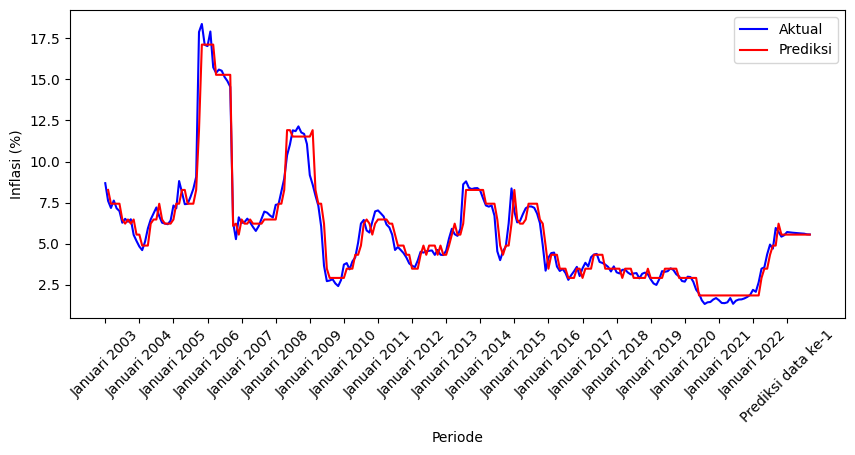

In [36]:
# Buat salinan DataFrame
df2_copy = df2.copy()
df2_copy = df2_copy.drop(index=df2_copy.index[-1])
# df2_copy = df2_copy[df2_copy['nilai prediksi'] != '']

# Reset indeks
df2_copy.reset_index(drop=True, inplace=True)

# Plot data
plt.figure(figsize=(10, 4))
plt.plot(df2_copy['Periode'], df2_copy['Data Inflasi'], color='blue', label='Aktual')
plt.plot(df2_copy['Periode'][1:], df2_copy['nilai prediksi'][1:], color='red', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df2_copy.index), 12))
plt.legend()
plt.show()

In [37]:
# # Membersihkan data dan mengonversi ke tipe data float
# df2_copy['nilai prediksi'] = pd.to_numeric(df2_copy['nilai prediksi'], errors='coerce')

# Menghitung MAPE dengan data yang bersih
y_actual = df2_copy['Data Inflasi'][1:-1].to_numpy()
y_predict = df2_copy['nilai prediksi'][1:-1].to_numpy()

# # Menghindari baris yang mengandung NaN
# valid_indices = ~np.isnan(y_actual) & ~np.isnan(y_predict)

# y_actual = y_actual[valid_indices] 
# y_predict = y_predict[valid_indices]

MAPE = mean_absolute_percentage_error(y_actual, y_predict)
print("MAPE =", MAPE*100)

MAPE = 9.28825322598201


In [42]:
dfJanSep = pd.read_csv("inflasi-januari-september.csv", sep=",")
dfJanSep

,Periode,Data Inflasi
0,Januari 2023,5.28
1,Februari 2023,5.47
2,Maret 2023,4.97
3,April 2023,4.33
4,Mei 2023,4.00
5,Juni 2023,3.52
6,Juli 2023,3.08
7,Agustus 2023,3.27
8,September 2023,2.28


In [43]:
df_result = pd.DataFrame()
df_result['hasil prediksi'] = df2['Data Inflasi'][len(df2.index)-jumlah_prediksi:].copy()
df_result.reset_index(inplace=True, drop=True)

In [44]:
dfJanSep['hasil prediksi'] = df_result
dfJanSep

,Periode,Data Inflasi,hasil prediksi
0,Januari 2023,5.28,5.702052
1,Februari 2023,5.47,5.679769
2,Maret 2023,4.97,5.660501
3,April 2023,4.33,5.643604
4,Mei 2023,4.00,5.628607
5,Juni 2023,3.52,5.615157
6,Juli 2023,3.08,5.602983
7,Agustus 2023,3.27,5.562800
8,September 2023,2.28,5.553812


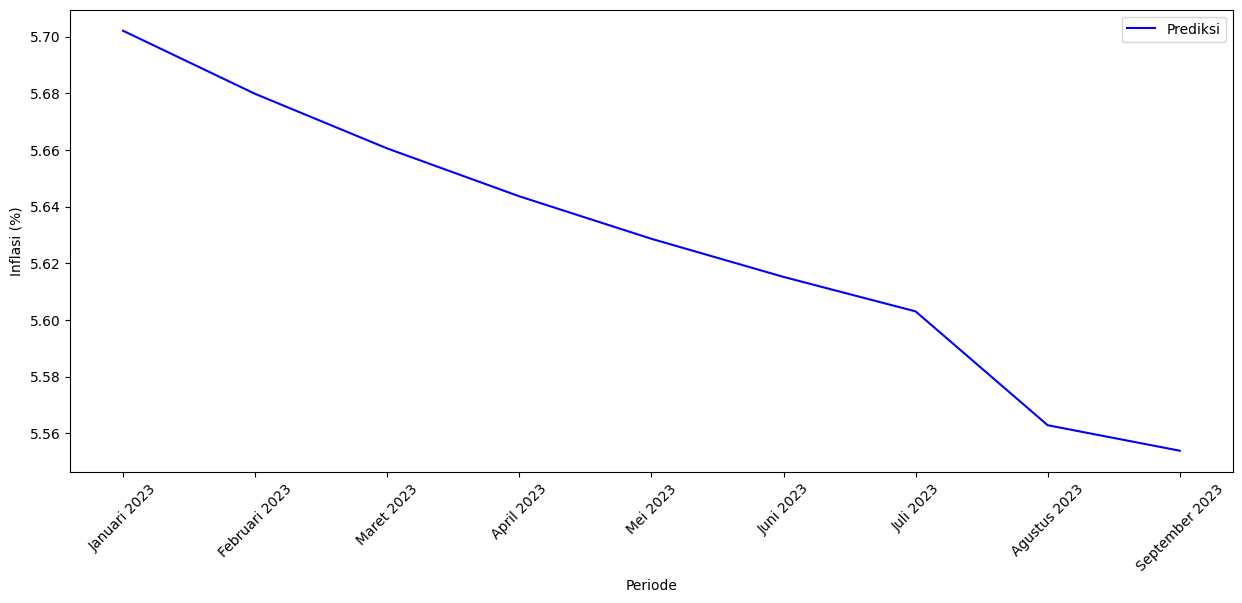

In [45]:
plt.figure(figsize=(15,6))
#plt.plot(dfJanSep['Periode'], dfJanSep['Data Inflasi'], color='green', label='Aktual')
plt.plot(dfJanSep['Periode'], dfJanSep['hasil prediksi'], color='blue', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

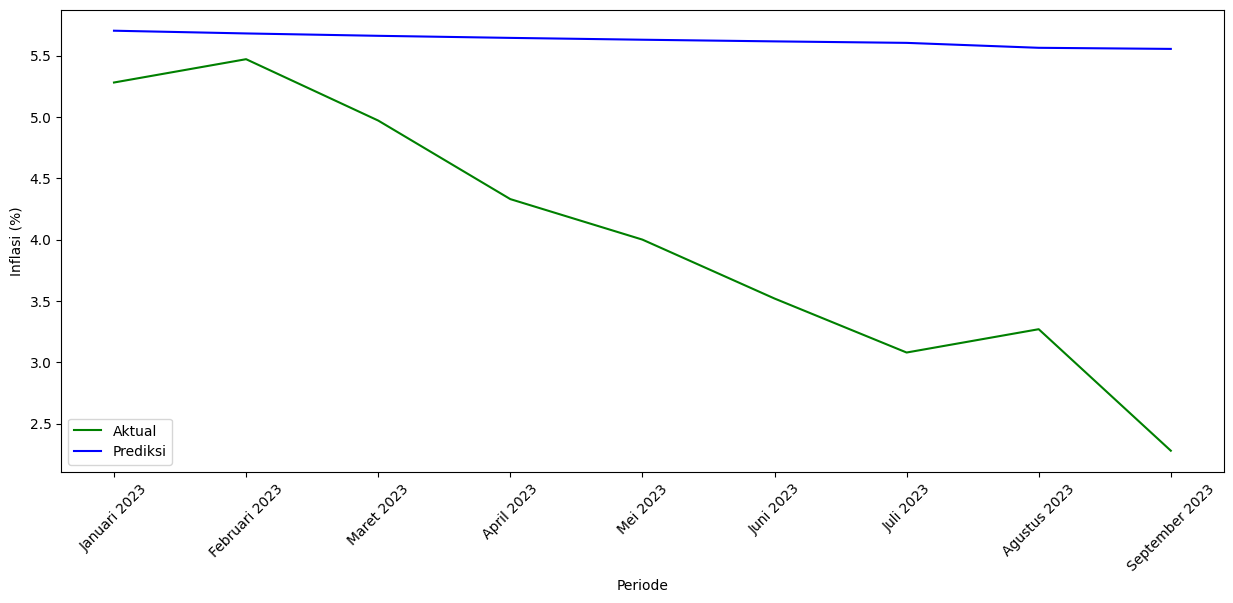

In [46]:
plt.figure(figsize=(15,6))
plt.plot(dfJanSep['Periode'], dfJanSep['Data Inflasi'], color='green', label='Aktual')
plt.plot(dfJanSep['Periode'], dfJanSep['hasil prediksi'], color='blue', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [47]:
# MAPE
y_actual = dfJanSep['Data Inflasi'].to_numpy()
y_predict = dfJanSep['hasil prediksi'].to_numpy()

MAPE = mean_absolute_percentage_error(y_actual, y_predict)
print("MAPE = ",MAPE*100)

MAPE =  50.21279226282211


In [48]:
# MAPE masing-masing
for j in range(len(dfJanSep.index)):
    mape = np.abs((dfJanSep['Data Inflasi'][j] - dfJanSep['hasil prediksi'][j]) / dfJanSep['Data Inflasi'][j]) * 100
    dfJanSep.at[j, 'MAPE'] = mape


In [49]:
dfJanSep

,Periode,Data Inflasi,hasil prediksi,MAPE
0,Januari 2023,5.28,5.702052,7.993409
1,Februari 2023,5.47,5.679769,3.834899
2,Maret 2023,4.97,5.660501,13.893380
3,April 2023,4.33,5.643604,30.337275
4,Mei 2023,4.00,5.628607,40.715175
5,Juni 2023,3.52,5.615157,59.521506
6,Juli 2023,3.08,5.602983,81.915032
7,Agustus 2023,3.27,5.562800,70.116208
8,September 2023,2.28,5.553812,143.588246


In [50]:
# menghitung rata-rata MAPE
rata_rata_mape = dfJanSep['MAPE'].mean()
print(rata_rata_mape)

50.21279226282212


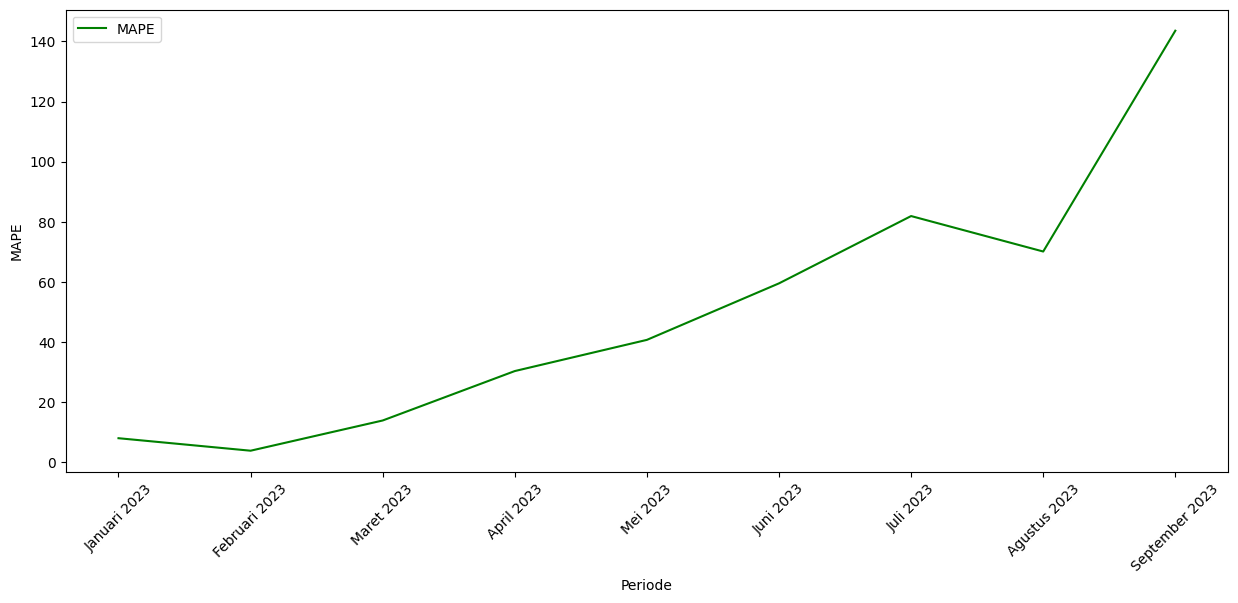

In [51]:
plt.figure(figsize=(15,6))
plt.plot(dfJanSep['Periode'], dfJanSep['MAPE'], color='green', label='MAPE')
plt.xlabel('Periode')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.legend()
plt.show()